# Regression
Looks now look at the housing dataset which has a continuous value output.

# Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
%matplotlib inline

In [2]:
n = 50
x = np.linspace(-10, 10, n)
y_truth = 2 * x ** 2 - 5 * x + 4

noise = np.random.randn(n) * 10
y = y_truth + noise

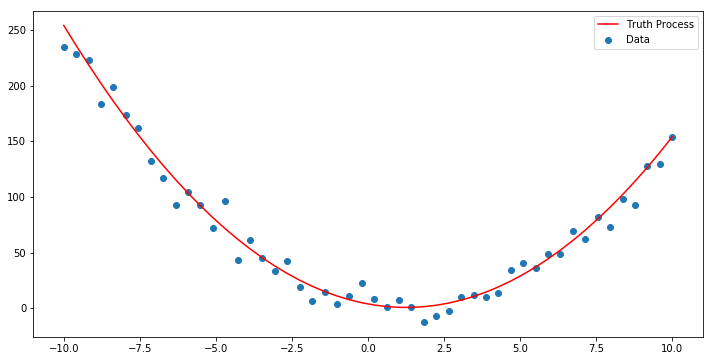

In [3]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, label='Data')
ax.plot(x, y_truth, label='Truth Process', color='red')
ax.legend()

In [4]:
from sklearn.linear_model import LinearRegression

## Make wrong assumption about nature of relationship - too simple

In [5]:
lr = LinearRegression()

In [6]:
X = x.reshape(-1, 1)

In [7]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_pred_under = lr.predict(X)

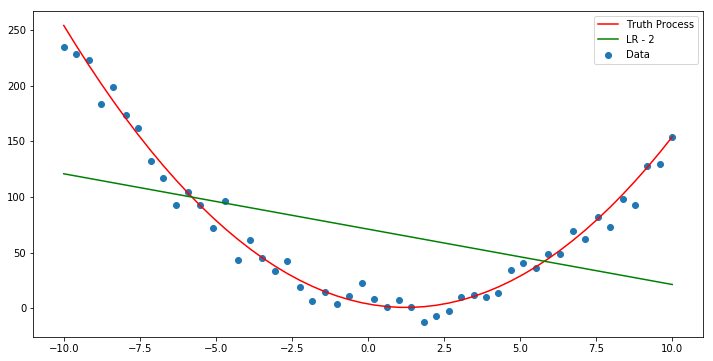

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, label='Data')
ax.plot(x, y_truth, label='Truth Process', color='red')
ax.plot(x, y_pred_under, label='LR - 2', color='green')
ax.legend()

## How well does the line do

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [11]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lr.score(X, y)

0.19044244621489181

In [13]:
kf = KFold(n_splits=5, shuffle=True)
cross_val_score(lr, X, y, cv=kf).mean()

-0.28628416331027279

## Again make wrong assumption - too complex

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
lr2 = LinearRegression()
pf = PolynomialFeatures(degree=10)
X_10 = pf.fit_transform(X)

In [16]:
lr2.fit(X_10, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_pred_over = lr2.predict(X_10)

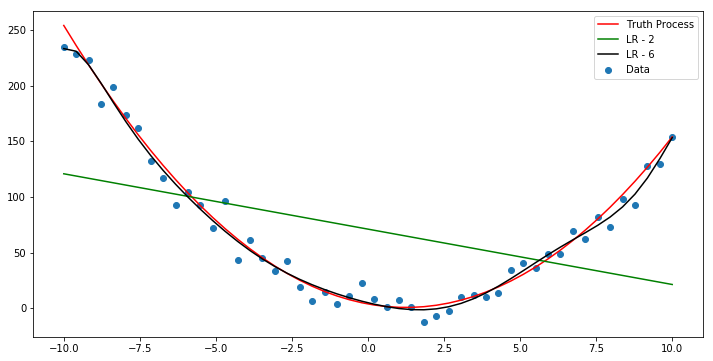

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, label='Data')
ax.plot(x, y_truth, label='Truth Process', color='red')
ax.plot(x, y_pred_under, label='LR - 2', color='green')
ax.plot(x, y_pred_over, label='LR - 6', color='black')
ax.legend()

In [19]:
lr2.score(X_10, y)

0.9815953303726217

In [20]:
cross_val_score(lr2, X, y, cv=kf).mean()

-0.0090761419342694459

# Correct Model
Since we created the true process, we know it is a quadratic function.

In [21]:
lr3 = LinearRegression()
pf = PolynomialFeatures(degree=2)
X_2 = pf.fit_transform(X)
lr3.fit(X_2, y)
y_pred_correct = lr3.predict(X_2)

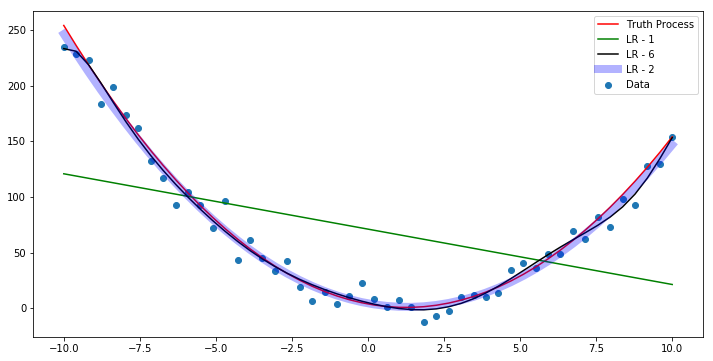

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, label='Data')
ax.plot(x, y_truth, label='Truth Process', color='red')
ax.plot(x, y_pred_under, label='LR - 1', color='green')
ax.plot(x, y_pred_over, label='LR - 6', color='black')
ax.plot(x, y_pred_correct, label='LR - 2', color='blue', lw=8, alpha=.3)
ax.legend()

## R-squared should not drop much when doing cross validation
In this particular case, we know a quadratic function is the ground truth. Therefore, we should expect our quadratic model should score about the same when validating.

In [23]:
lr3.score(X_2, y)

0.97872830838545943

In [24]:
cross_val_score(lr3, X_2, y, cv=kf).mean()

0.96435089330410884

# Hardly ever know true relationship
You are unlikely to encounter the fictional scenario from above where the underlying process is completely known. It is still possible to build a highly flexible model like we saw with 10 degree polynomial without overfitting.

# Regularization
In machine learning, regularization is a process of constraining our model during training so that it doesn't overfit the model to the training data. We purposefully weaken the model so that it can't fit the noise. It is, of course, possible to apply too much of a dampening affect so that the signal is lost. The key is to find just the right amount regularization.

## Regularization in linear regression
Without regularization, the goal of linear regression is to get our predictions as close to the actual points as possible. However, when using regularization, we have an additional goal of keeping the values of the fitted parameters within a certain threshold.


# Ridge/Lasso Regression - A new problem formulation
* Minimize the sum of squared errors.
* For ridge, the sum of the squared values of the parameters must be less than some number (Scikit-Learn uses **`C`**)
* For lasso, we use the sum of the absolute values of the parameters.


## There is a boundary for your parameters - Find the minimum sum of squares within this boundary

![][1]


[1]: images/ridge.png?1

# Can no longer reach the minimum squared error
The center of the red contours represents the optimal values of the parameters without constraints. 

The points where the contour touches the blue-green region is the lasso/ridge solution.

# Use regularization on our 10 degree polynomial
Above, we created a 10-degree polynomial to model a 2-degree function. We subsequently overfit and had terrible results on the test data.

In [25]:
lr2 = LinearRegression()
pf = PolynomialFeatures(degree=10)
X_10 = pf.fit_transform(X)
lr2.fit(X_10, y)
lr2.score(X_10, y)

0.9815953303726217

In [26]:
cross_val_score(lr2, X_10, y, cv=kf).mean()

0.9407741188175629

## Use the Ridge and Lasso regressors in scikit-learn

In [27]:
from sklearn.linear_model import Ridge, Lasso

#### Press shift + tab + tab
Notice that we have a new parameter, alpha. This is the regularization parameter. The larger the values, the larger the constraint.

### Let's see how much improvement we get from using the default value for the regularization parameter

In [28]:
ridge = Ridge()

### The model is still overfitting - Add more regularization

In [29]:
ridge = Ridge(10)

## Still not enough

In [30]:
ridge = Ridge(10**7)
ridge.fit(X_10, y)
ridge.score(X_10, y)
cross_val_score(ridge, X_10, y, cv=kf).mean()

0.90947033889220863

## Regularization does not work when the features are of different scales

In [31]:
X_10.mean(axis=0)

array([  1.00000000e+00,  -1.42108547e-16,   3.46938776e+01,
         2.04636308e-14,   2.16544127e+03,   2.03726813e-12,
         1.60815873e+05,   2.23517418e-10,   1.29976056e+07,
         3.09944153e-08,   1.10448738e+09])

# Scale features so they are all in the same range
Standardization is the process of transforming a feature such that it has mean 0 and standard deviation of 1. Scikit-Learn provides the **`StandardScaler`** estimator.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

In [34]:
X_10_scaled = ss.fit_transform(X_10)

### Try again with the default

In [35]:
ridge = Ridge()
ridge.fit(X_10_scaled, y)
ridge.score(X_10_scaled, y)

0.97793781314281525

In [36]:
cross_val_score(ridge, X_10_scaled, y, cv=kf).mean()

0.96990767597278005

## Plot the regularized curve
The 10-degree polynomial has now been regularized and is visibly much smoother. Which is exactly what we would hope for when regularizing.

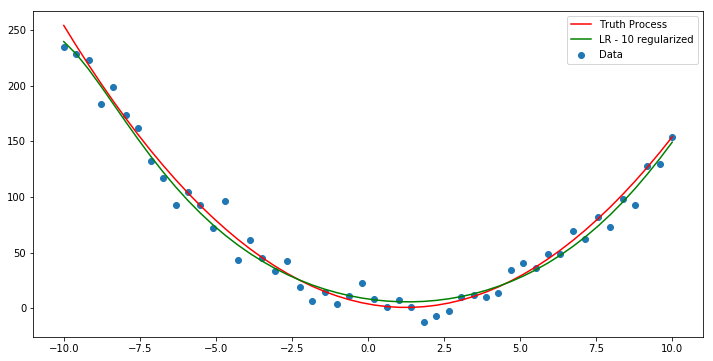

In [37]:
y_pred = ridge.predict(X_10_scaled)

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, label='Data')
ax.plot(x, y_truth, label='Truth Process', color='red')
ax.plot(x, y_pred, label='LR - 10 regularized', color='green')
ax.legend()

# Verify that the sum of the coefficients have shrunk

In [38]:
lr_old = LinearRegression()
lr_old.fit(X_10_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

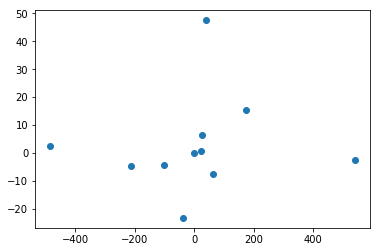

In [40]:
plt.scatter(lr_old.coef_, ridge.coef_)

In [41]:
(ridge.coef_ ** 2).sum()

3196.1711734940482

In [42]:
(lr_old.coef_ ** 2).sum()

620630.76631977572

# Exercise
Find the optimal value for the regularizer.

In [ ]:
# your code here

#  Exericse
Use ridge and lasso on the housing dataset.

In [69]:
khdata = pd.read_csv('data/kaggle_housing.csv')
khdata.head()

#get housing data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
khdata.pop('SalePrice')
#get rid of sale price data

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [71]:
numdata = khdata.select_dtypes('number')
numdata.head(10)
#get all the columns with numeric data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008


In [72]:
h2 = numdata.fillna(numdata.mean())
#fill in missing values with the mean
h2.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008


In [74]:
from sklearn.linear_model import Ridge

# Ridge regression prevents you from overfitting
# higher alpha hyperparameter , more dampening 
# lasso regression can be used to eliminate variables ... useless params
# investigate in feature selection modules in API
# applying more regularization will result in simpler model ... less overfit

In [ ]:
Ridge()

# Bias/Variance Tradeoff
### Definitions

![](images/bias_var_right.png)
* **Bias** - You have lots confidence in your assumptions about the model and use a model that is not flexible enough to capture more complex relation ships
* **Variance** - You put too much reliance on the data. You build a model that is very sensitive to the inputs and overfits the data. Small changes of the input data can lead to drastically different fitted values of the parameters.

![](images/bv_trade.png?1)